### E22031 - Shriya Muralidas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import random
import seaborn as sns
from scipy import stats

In [3]:
#import os
#os.chdir(r'C:\Users\Shriya\Downloads\PPP')

In [4]:
df=pd.read_csv('insurance_data.csv')

In [5]:

df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


## Business problem
Insurance is a contract, represented by a policy, in which they receive financial protection or reimbursement against losses from an insurance company. 
The goal here is to predict the claim amount which will be given to policy holder

### Need for the Study

 The need of this study is to find the major factors that contribute to the medical claims that includes age, BMI, smoking etc.
Factors like old age, smoking, BP usually indicate what person's health is like.These seem relevant in predicting claim.
So, Insurer provider looks at these few attritutes to estimate the appropriate claim.



### Questions
1.What Proportion of people have normal BMI.

2.Whether there are patients with under-18.5 BMI.

3.GENDER proportion.

4.Proportion of people with BP >120.

5.What Proportion of people are diabetic.

6.What proprtion of people smoke.

7.REGION wise proportion of people.

### Evaluation Criteria Selection


Evaluation criteria for claim is dediced by the attributes present in the dataset.

1.A normal blood pressure level is less than 120/80 mmHg.
ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be 90/60mmHg or lower.

2.BMI in the range 18.5—24.9 is considered healthy.Below 18.5 is considered underweight and 25 to 29.9 is considered to be overweight and 30 to 39.9 is considered to as obese

### Relevance ,Quality  of data

Factors like old age, smoking, BP usually indicate what person's health is like.These seems relevant in predicting claim.
There could be other attributes too which can be responsible for predicting claim amount from the provided data

In [6]:
#checking for null values
print(pd.isnull(df).sum())

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64


From above dervived data, we can see that there are 5 null values in age attribute and 3 null values present in Region attribute

In [7]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


####  PatientID
The total number of Patients are 1340

#### Age
The average age is 38.
The age ranges from 18-60

#### BMI
Average BMI is 30.
The BMI range is from 16-53

#### BP
Average BP is 94.
It ranges from 80 to 140

#### Children
They have 1 child on an average.
The age ranges of children are from 0-5

#### Claim
Maximum claimed amount is 63770.
Minimum claimed amount is 1121.
Average claimed amount is 13252

In [8]:
df.age=df.age.fillna(df.age.mode()[0])
df.region=df.region.fillna(df.region.mode()[0])
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [9]:
df_nm_features = df.select_dtypes(exclude='object')  #this variable will have all the numerical variable
df_ct_features = df.select_dtypes(include='object')  #this one will have all the categorical

In [10]:
df_nm_features

,PatientID,age,bmi,bloodpressure,children,claim
0,1,39.0,23.2,91,0,1121.87
1,2,24.0,30.1,87,0,1131.51
2,3,43.0,33.3,82,0,1135.94
3,4,43.0,33.7,80,0,1136.40
4,5,43.0,34.1,100,0,1137.01
...,...,...,...,...,...,...
1335,1336,44.0,35.5,88,0,55135.40
1336,1337,59.0,38.1,120,1,58571.07
1337,1338,30.0,34.5,91,3,60021.40
1338,1339,37.0,30.4,106,0,62592.87


In [11]:
df_ct_features 

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


#### Numerical Attritube


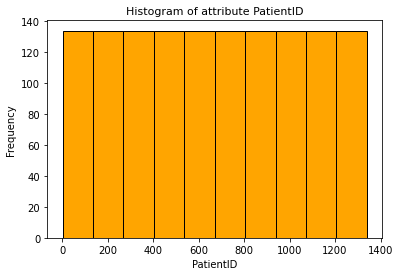

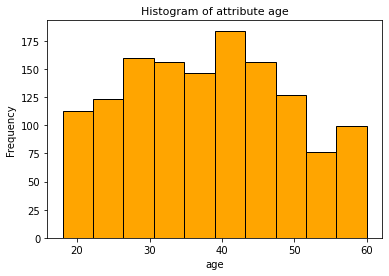

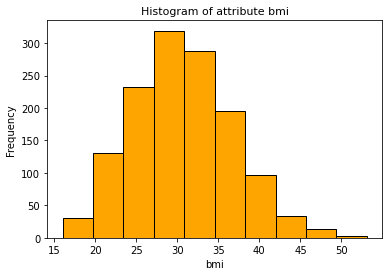

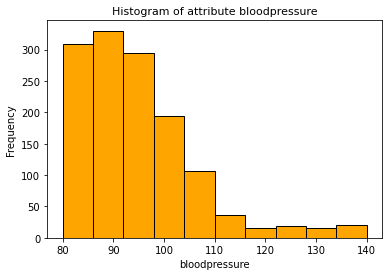

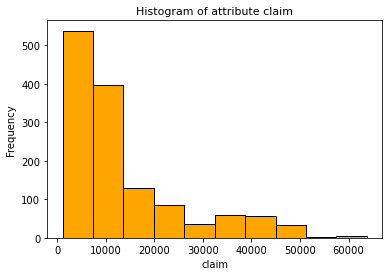

In [12]:
#checking distribution of variables.
for i in df_nm_features:
    if len(df_nm_features[i].unique())>6:
        
        plt.hist(df_nm_features[i],color="orange",edgecolor="black") #making histogram of orange colour and black edge
        plt.xlabel(i)                         #labelling x axis
        plt.ylabel('Frequency ')
        plt.title('Histogram of attribute '+i,fontsize=11)
        plt.show()

Observations from Histogram:

Age is somewhat normally distributed.

BMI is slightly right skewed.

BP and Claim are right skewed.


<AxesSubplot:xlabel='age'>

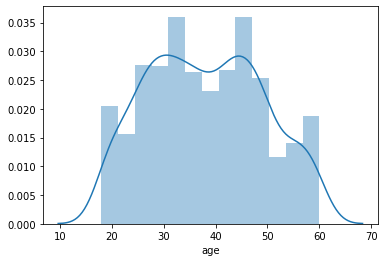

In [13]:
sns.distplot(df.age)


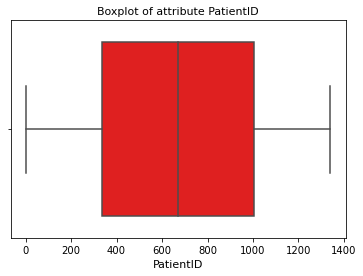

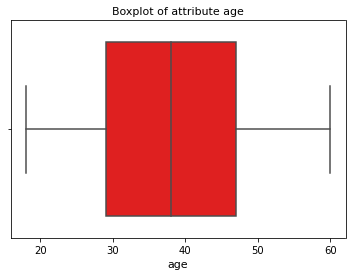

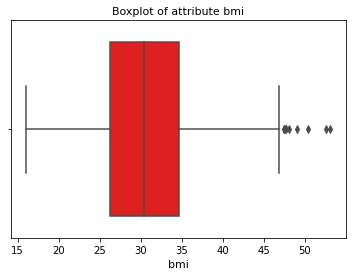

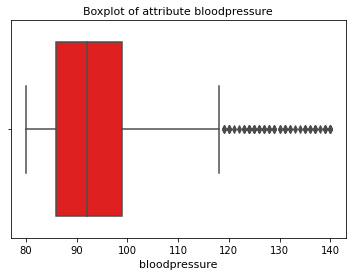

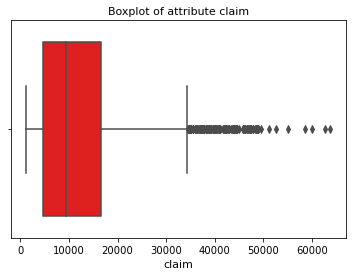

In [14]:
for i in df_nm_features:
    if len(df_nm_features[i].unique())>6:
          
        sns.boxplot(x=df_nm_features[i],color='red') #making boxplot of blue colour
        plt.xlabel(i,fontsize=11)
        plt.title('Boxplot of attribute '+i,fontsize=11) # string concatenation in naming
        plt.show()

#### Observations from Boxplot:

We can see lot of outliers being present for Claims, Bloodpressure and few for BMI.

55 people have blood pressure above 120.

133 people claimed more than 35000.

16 people have BMI more than 46.

In [15]:
(df['bloodpressure']>120 ).value_counts()

False    1285
True       55
Name: bloodpressure, dtype: int64

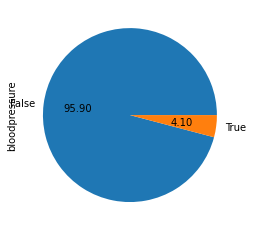

In [16]:
#what proportion of people have bmi above 120
(df['bloodpressure']>120 ).value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [17]:
(df['claim']>35000).value_counts()

False    1207
True      133
Name: claim, dtype: int64

In [18]:
(df['bmi']>46).value_counts()

False    1324
True       16
Name: bmi, dtype: int64

#### Observations on numerical data:

Age:
Age does not seem to be normally distrubted

BMI:
Outliers are present for BMI
As we know, BMI in the range 18.5—24.9 is considered healthy. 30 to 39.9 is considered to as obese.
Under our observation we can see that, 16 people have BMI more than 46, which is obese.

Blood Pressure:
We observe outliers even in Bloodpressure.
55 people have blood pressure above 120, who are considered to be higher
BP is right skewed

Claims:
This is also right skewed and outliers are present even here
133 people claimed more than 35000


#### Categorical Analysis:


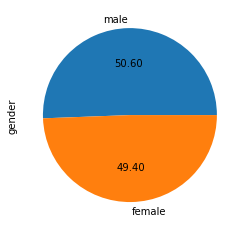

In [19]:
#gender proportion
df['gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [20]:
#no of childern patient has
df['children'].value_counts()

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

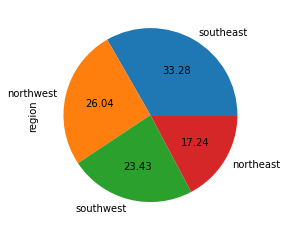

In [21]:
#region wise distribution of patients
df['region'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

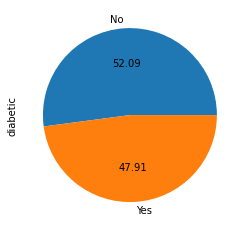

In [22]:
#diabetic proportion
df['diabetic'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

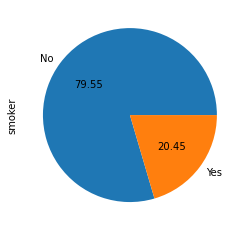

In [23]:
#what proportion of patients smoke
df['smoker'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

#### Analysis
Gender:
Male and Female ratio is almost equal

Children:
People having no children are the maximum
People with 5 children are the least around 18

Diabetic:
Number of Diabetic patients and non diabetic patients are almost equal

Smoker:
The ratio between non smokers and smokers is almost 1:4
The non smokers are least in number around 20

In [24]:
#correlation matrix  (with colur gradient)
corr=df.corr()
corr.style.background_gradient()

,PatientID,age,bmi,bloodpressure,children,claim
PatientID,1.000000,-0.010298,0.115129,0.450602,0.128104,0.879268
age,-0.010298,1.000000,-0.040847,-0.061001,-0.027002,-0.029505
bmi,0.115129,-0.040847,1.000000,0.143544,0.012092,0.197401
bloodpressure,0.450602,-0.061001,0.143544,1.000000,-0.031682,0.531341
children,0.128104,-0.027002,0.012092,-0.031682,1.000000,0.069233
claim,0.879268,-0.029505,0.197401,0.531341,0.069233,1.000000


bp has correlation of .53 with claim


### QUESTIONS FOR BIVARIATE ANALYSIS



1. Do smokers claim more compared to non smokers?
2. Whether having more childern increases your BP?
3. Do diabetic people have more BMI?
4. Majority smokers are from which region?
5. Which age group smokes more?
6. Which age group claims more?

In [25]:
#sns.distplot(df['claim'],color='Purple',norm_hist=True,label="Claim")

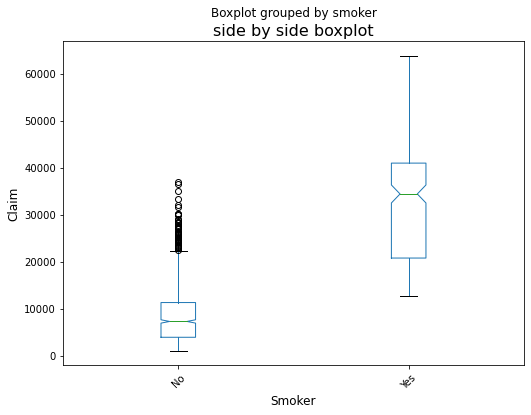

In [26]:
#1 Smoker vs claim
df.boxplot(column="claim",notch=True,
            by="smoker",
             grid=False,
            figsize=(8,6),
            rot=45)
                    #to plot a horizontal boxplot
plt.xlabel("Smoker", fontsize=12)
plt.ylabel('Claim',fontsize =12)
plt.title("side by side boxplot", fontsize=16)

plt.show()

AVG amount claimed by smoker is more than non smokers

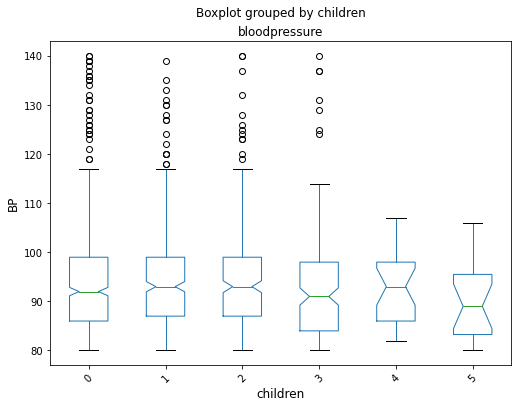

In [27]:
#2 BP VS CHILDERN
df.boxplot(column="bloodpressure",notch=True,
            by="children",
             grid=False,
            figsize=(8,6),
            rot=45)
                    #to plot a horizontal boxplot
plt.xlabel("children", fontsize=12)
plt.ylabel('BP',fontsize =12)


plt.show()


In [28]:
#claim above 30000 and bp above 120.
((df['children']<3 ) & (df['bloodpressure']>120 )).sum()

48

there are 48 outliers for patients with childern <3, but meadian seems to hover around 90 for irespective of no of childern.

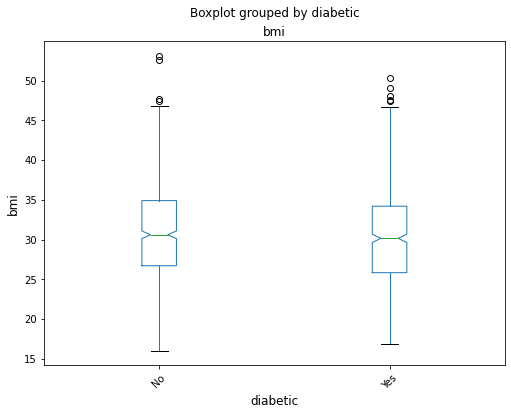

In [29]:
#3 BMI VS DIABETIC
df.boxplot(column="bmi",notch=True,
            by="diabetic",
             grid=False,
            figsize=(8,6),
            rot=45)
                    #to plot a horizontal boxplot
plt.xlabel("diabetic", fontsize=12)
plt.ylabel('bmi',fontsize =12)


plt.show()


BMI does not looks determinental for diabeties 

In [30]:
#4 REGIONWISE SMOKERS
table=pd.crosstab(df.smoker,columns=df.region)
(table/1340)*100

region,northeast,northwest,southeast,southwest
smoker,,,,
No,12.238806,21.716418,26.492537,19.104478
Yes,5.000000,4.328358,6.791045,4.328358


majority of smokers are from southeast 26%

In [31]:
#smokers vs gender
table=pd.crosstab(df.gender,columns=df.smoker)
(table/1340)*100

smoker,No,Yes
gender,,
female,40.820896,8.582090
male,38.731343,11.865672


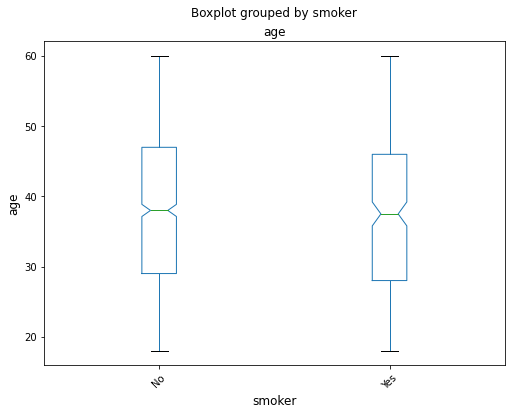

In [32]:
#5 Smoker vs Age
df.boxplot(column="age",notch=True,
            by="smoker",
             grid=False,
            figsize=(8,6),
            rot=45)
                    #to plot a horizontal boxplot
plt.xlabel("smoker", fontsize=12)
plt.ylabel('age',fontsize =12)

plt.show()


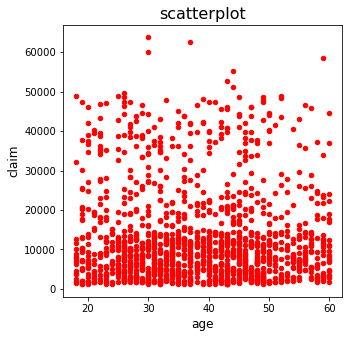

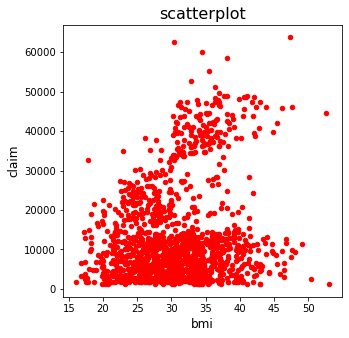

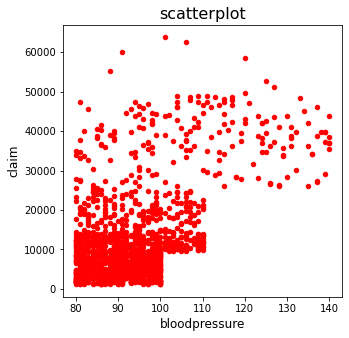

In [33]:
#age vs claim
col=['age','bmi','bloodpressure']

for i in col:
    df.plot(kind="scatter",                                    
                        x=i,y='claim',                                 
                        color='red',                                      
                        figsize=(5,5)) 
    plt.ylabel("claim", fontsize=12)
    plt.xlabel(i,fontsize =12)
    plt.title("scatterplot", fontsize=16)
    plt.show()

#above question was not helping with anything, so we did further analysis

Q. how many patients with bp above 120 claimed above 30000


In [34]:
#claim above 30000 and bp above 120.
((df['claim']>30000 ) & (df['bloodpressure']>120 )).sum()

45

In [35]:
#claim above 30000 and bp below 120.
((df['claim']>30000 ) & (df['bloodpressure']<120 )).sum()

113

#CLAIM ABOVE 13252 AND AGE ABOVE 38.

In [36]:
#6) claim above 13252 and age above 120.
((df['claim']>13252 ) & (df['age']>38 )).sum()


201

In [37]:
#6) claim above 1352 and age above 120.
((df['claim']>13252 ) & (df['age']<38 )).sum()
#people above the age of 38 and below are claiming almost the same amount

208

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


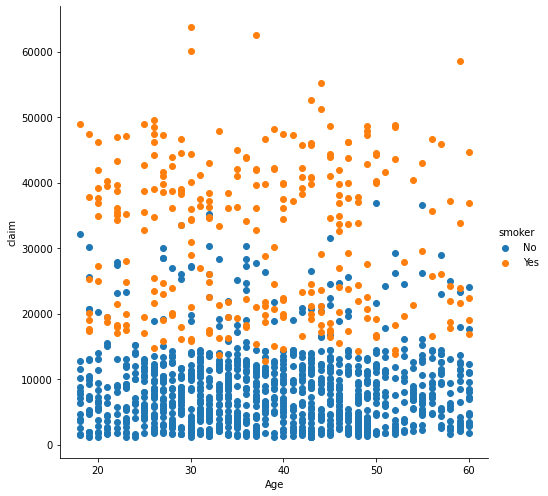

In [38]:
#age vs claim vs smokers
(sns
 .FacetGrid(df, hue='smoker', size=7)
 .map(plt.scatter, 'age', 'claim')
 .add_legend()
 .set(
    title='',
    xlabel='Age',
    ylabel='claim'
 ));

smokers claim higher amounts across all age groups

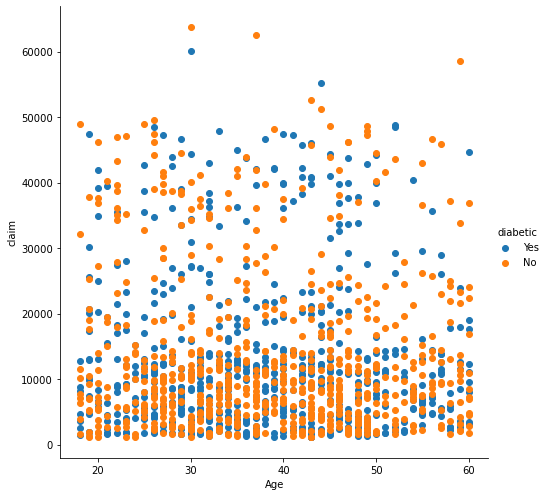

In [39]:
#age vs claim vs smokers
(sns
 .FacetGrid(df, hue='diabetic', size=7)
 .map(plt.scatter, 'age', 'claim')
 .add_legend()
 .set(
    title='',
    xlabel='Age',
    ylabel='claim'
 ));

unconclusive,nothing can be clearly said 

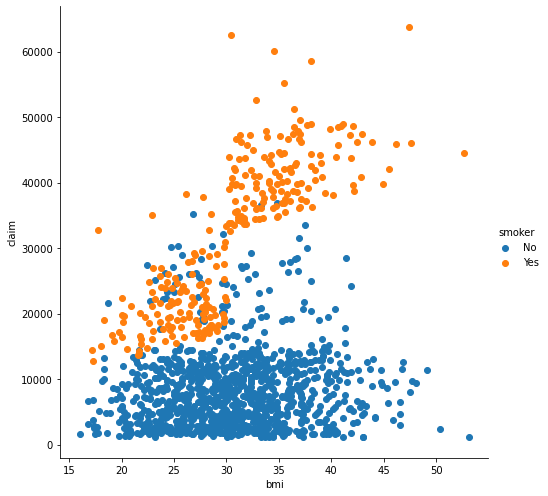

In [40]:
#bmi vs claim vs smokers
(sns
 .FacetGrid(df, hue='smoker', size=7)
 .map(plt.scatter, 'bmi', 'claim')
 .add_legend()
 .set(
    title='',
    xlabel='bmi',
    ylabel='claim'
 ));

smokers having bmi above 30 claim huge amounts

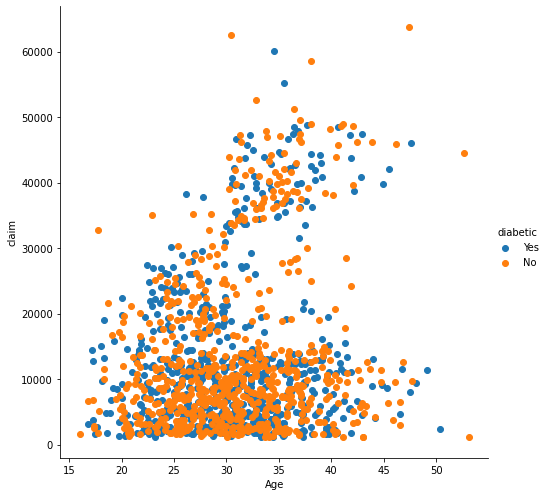

In [41]:
#bmi vs claim vs diabetic
(sns
 .FacetGrid(df, hue='diabetic', size=7)
 .map(plt.scatter, 'bmi', 'claim')
 .add_legend()
 .set(
    title='',
    xlabel='Age',
    ylabel='claim'
 ));

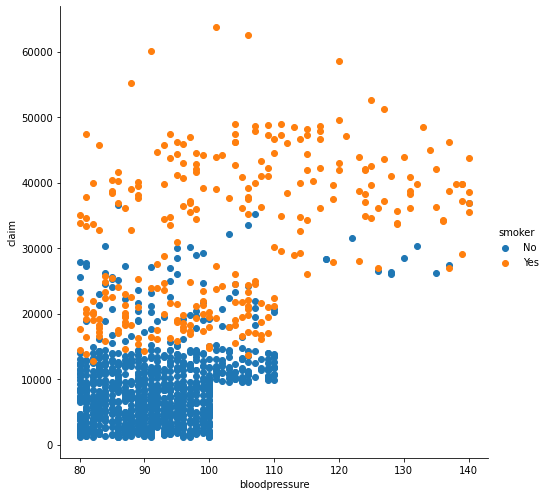

In [42]:
#bmi vs claim vs smokers
(sns
 .FacetGrid(df, hue='smoker', size=7)
 .map(plt.scatter, 'bloodpressure', 'claim')
 .add_legend()
 .set(
    title='',
    xlabel='bloodpressure',
    ylabel='claim'
 ));

claims above 15000 are taken by smokers.

### Feature Engineering

In [43]:
#Creating dummy variables for 'gender'
dummies = pd.get_dummies(df.gender)
dummies.columns

Index(['female', 'male'], dtype='object')

In [44]:
df = pd.concat([df,dummies],axis= 'columns')

In [45]:
#Creating dummy variables for 'diabetic'
dummies = pd.get_dummies(df.diabetic)
dummies.columns
df = pd.concat([df,dummies],axis= 'columns')

In [46]:
#Creating dummy variables for 'smoker'
dummies = pd.get_dummies(df.smoker)
dummies.columns
df = pd.concat([df,dummies],axis= 'columns')

In [47]:
#Creating dummy variables for 'region'
dummies = pd.get_dummies(df.region)
dummies.columns
df = pd.concat([df,dummies],axis= 'columns')

In [48]:
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,female,male,No,Yes,No,Yes,northeast,northwest,southeast,southwest
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,0,1,0,1,1,0,0,0,1,0
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,0,1,1,0,1,0,0,0,1,0
2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,0,1,0,1,1,0,0,0,1,0
3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40,0,1,1,0,1,0,0,1,0,0
4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,1,0,0,1,0,1,0,1,0,0
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,1,0,1,0,0,1,1,0,0,0
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,0,1,0,1,0,1,0,1,0,0
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,0,1,1,0,0,1,0,0,1,0


### FITTING DECISION TREE

In [49]:
import matplotlib.pyplot as plt

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

In [50]:
X = df.drop(["PatientID","gender","diabetic","smoker","region"], axis=1)
y = df.claim

In [51]:
X

,age,bmi,bloodpressure,children,claim,female,male,No,Yes,No,Yes,northeast,northwest,southeast,southwest
0,39.0,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.0,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
2,43.0,33.3,82,0,1135.94,0,1,0,1,1,0,0,0,1,0
3,43.0,33.7,80,0,1136.40,0,1,1,0,1,0,0,1,0,0
4,43.0,34.1,100,0,1137.01,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,35.5,88,0,55135.40,1,0,0,1,0,1,0,1,0,0
1336,59.0,38.1,120,1,58571.07,1,0,1,0,0,1,1,0,0,0
1337,30.0,34.5,91,3,60021.40,0,1,0,1,0,1,0,1,0,0
1338,37.0,30.4,106,0,62592.87,0,1,1,0,0,1,0,0,1,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1) #greedy algorithm
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [58]:
y_pred = reg_tree.predict(X_test)

In [59]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

4.416559165719498

In [ ]:
#we can see that it might be overfitting, we will try to fit further with Linear Regression. We will check assumptions, if not according to LR then different models

In [56]:
## hypothesis Testing

#step 1
H0:mu<=30.67  ,  H1:mu>30.67 

SyntaxError: invalid syntax (Temp/ipykernel_16164/2704602239.py, line 4)

In [ ]:
sigma=df['bmi'].std()
mu=df['bmi'].mean()
sigma,mu

x_bar=31

df['bmi'].sample(n=30, random_state=1)

a=0.05

Zcritical= stats.norm.isf(0.05)                   
print(Zcritical)                

Z_statistic=((31-30.66)/(sigma/np.sqrt(30)))
print(Z_statistic)

In [ ]:
df[df.gender=="male"].claim.mean()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Integer encode columns with 2 unique values
for col in ['gender', 'smoker']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['region'], prefix = ['region'])